In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

<div class="alert alert-info" role="alert">
    <h1>DATA IMPORT</h1>
</div>

In [2]:
from sklearn import datasets

feature:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 classes:  ['setosa' 'versicolor' 'virginica'] 

dimensione features vector (150, 4)
dimensione labels vector (150,)


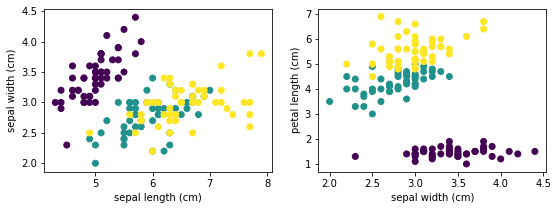

In [3]:
#load iris dataset 3 classes, 4 features,50 samples 

iris = datasets.load_iris()
#print(iris)

print ('feature: ',iris.feature_names,'\n classes: ',iris.target_names,'\n')
#print(iris.DESCR,'\n')

data = iris.data
labels = iris.target

print('dimensione features vector',data.shape)
print('dimensione labels vector',labels.shape)

fig,ax=plt.subplots(1,2)
fig.set_size_inches(9,3)
for axis,i in zip(ax,range(0,2)):
  axis.scatter(data[:,i],data[:,i+1],c=labels)
  axis.set_xlabel(iris.feature_names[i])
  axis.set_ylabel(iris.feature_names[i+1])

plt.show()

<div class="alert alert-info" role="alert">
    <h1>ML MODEL</h1>
</div>

Silhouette coefficient explanation

https://www.youtube.com/watch?v=AtxQ0rvdQIA

### K-means - 1st use

In [4]:
from sklearn.cluster import KMeans
from sklearn import metrics

Number of clusters: 3
Homogeneity: 0.800
Completeness: 0.805
V-measure: 0.802
Adjusted Rand Index: 0.802
Adjusted Mutual Information: 0.800
Silhouette Coefficient: 0.593


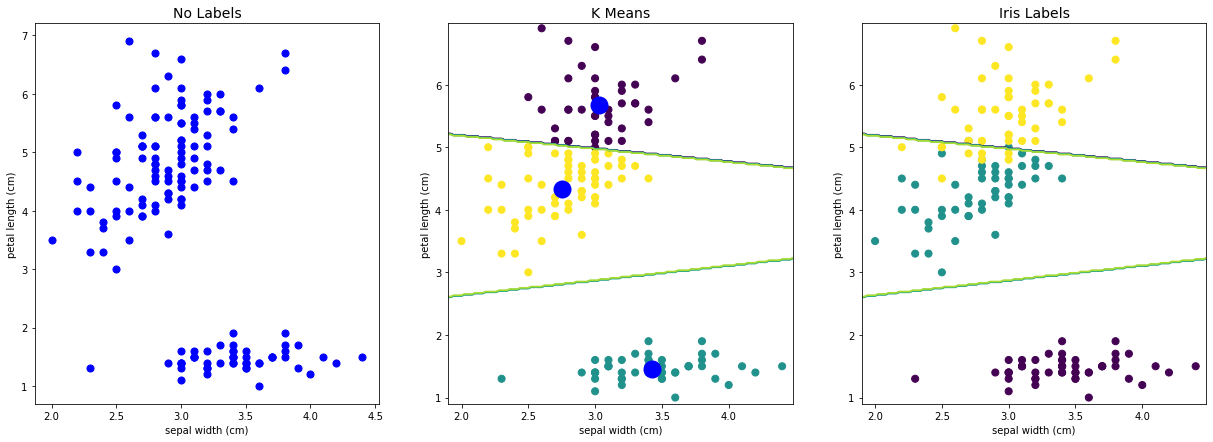

In [5]:
# Iris Dataset
iris = datasets.load_iris()
X = iris.data
X = X[:,1:3]
axes_labes=iris.feature_names
axes_labes=axes_labes[1:3]

# KMeans
n_clusters = 3
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)
km.predict(X)

labels = ('b', km.labels_, iris.target)
title =('No Labels','K Means','Iris Labels',)
fig, ax = plt.subplots(1, len(labels), figsize=(21,7))

for i, label in enumerate(labels):
  ax[i].scatter(X[:, 0], X[:, 1], c=label, s=50)
  ax[i].set_xlabel(axes_labes[0])
  ax[i].set_ylabel(axes_labes[1])
  ax[i].set_title(title[i], fontsize=14)

  if title[i]!='No Labels':
    if title[i]=='K Means':
      # Plot the centroids as O blue
      centroids = km.cluster_centers_
      ax[i].scatter(centroids[:, 0], 
                    centroids[:, 1],
                    marker='o', 
                    s=169, 
                    linewidths=5,
                    color='b', 
                    zorder=10)
      # print metrics
      print('Number of clusters: %d' % n_clusters)
      print("Homogeneity: %0.3f" % metrics.homogeneity_score(iris.target, km.labels_))
      print("Completeness: %0.3f" % metrics.completeness_score(iris.target, km.labels_))
      print("V-measure: %0.3f" % metrics.v_measure_score(iris.target, km.labels_))
      print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(iris.target, km.labels_))
      print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(iris.target, km.labels_))
      print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, km.labels_))

  
    # prepare grid to be used in contourf
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    #print('Mesh dimension',xx.shape,'x',yy.shape)

    Z = km.predict(np.array([xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape)

    # plot decision region
    ax[i].contour(xx, yy,Z)

### K-means - 2nd use

The k-means algorithm is very fast (one of the fastest clustering algorithms available), but it falls in local minima. That’s why it can be useful to restart it several times.

Number of clusters: 3
Homogeneity: 0.800
Completeness: 0.805
V-measure: 0.802
Adjusted Rand Index: 0.802
Adjusted Mutual Information: 0.800
Silhouette Coefficient: 0.593


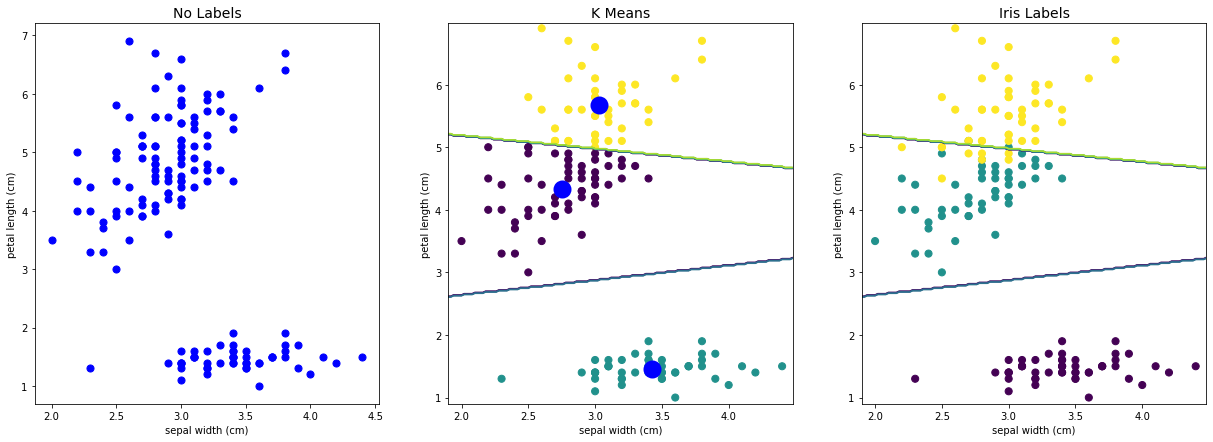

In [6]:
# Iris Dataset

iris = datasets.load_iris()
X = iris.data
X = X[:,1:3]
axes_labes=iris.feature_names
axes_labes=axes_labes[1:3]

# number of clusters
n_clusters=3

km = KMeans(n_clusters=n_clusters, init='random', n_init=2)
'''
- n_init:
Number of time the k-means algorithm will be run with different centroid seeds. 
The final results will be the best output of n_init consecutive runs in terms of inertia.
- init:
Method for initialization,
‘k-means++’(selects initial cluster centers for k-mean clustering in a smart way to speed up convergence).
‘random’ (choose k observations (rows) at random from data for the initial centroids).
'''
km.fit(X)
km.predict(X)

labels = ('b', km.labels_, iris.target)
title =('No Labels','K Means','Iris Labels',)
fig,ax = plt.subplots(1,len(labels), figsize=(21,7))

for i, label in enumerate(labels):
  ax[i].scatter(X[:, 0], X[:, 1], c=label, s=50)
  ax[i].set_xlabel(axes_labes[0])
  ax[i].set_ylabel(axes_labes[1])
  ax[i].set_title(title[i], fontsize=14)

  if title[i]!='No Labels':
    if title[i]=='K Means':
      # Plot the centroids as O blue
      centroids = km.cluster_centers_
      ax[i].scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=169, linewidths=5,
                color='b', zorder=10)
      # print metrics
      print('Number of clusters: %d' % n_clusters)
      print("Homogeneity: %0.3f" % metrics.homogeneity_score(iris.target, km.labels_))
      print("Completeness: %0.3f" % metrics.completeness_score(iris.target, km.labels_))
      print("V-measure: %0.3f" % metrics.v_measure_score(iris.target, km.labels_))
      print("Adjusted Rand Index: %0.3f" 
            % metrics.adjusted_rand_score(iris.target, km.labels_))
      print("Adjusted Mutual Information: %0.3f"
            % metrics.adjusted_mutual_info_score(iris.target, km.labels_))
      print("Silhouette Coefficient: %0.3f"
            % metrics.silhouette_score(X, km.labels_))

  
    # prepare grid to be used in contourf
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    #print('Mesh dimension',xx.shape,'x',yy.shape)

    Z = km.predict(np.array([xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape)

    #plot decision region
    ax[i].contour(xx, yy,Z)